In [1]:
from pipeline import G_StableDiffusionPipeline
from utils.draw_pose import *
from diffusers import UNet2DConditionModel
from model import GUNet2DConditionModel


/mnt/mcu/shuowen/envs/test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/mcu/shuowen/envs/test/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [2]:
model = G_StableDiffusionPipeline.from_pretrained('sw1125/gunet',safety_checker=None).to(device)
gunet = GUNet2DConditionModel.from_pretrained('sw1125/gunet',subfolder="unet",safety_checker=None).to(device)
model.unet = gunet

Loading pipeline components...:  17%|█▋        | 1/6 [00:00<00:00,  6.90it/s]/mnt/mcu/shuowen/envs/test/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Some weights of the model checkpoint were not used when initializing UNet2DConditionModel: 
 ['spa_block.b, spa_block.theta']
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 17.26it/s]
You have disabled the safety checker for <class 'pipeline.G_StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases th

In [ ]:
# device = "cuda"
# model = G_StableDiffusionPipeline.from_pretrained('/trained/save_1000',safety_checker=None).to(device)
# gunet = GUNet2DConditionModel.from_pretrained("/trained/save_1000/unet").to(device)
# model.unet = gunet

  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [00:01<00:00, 15.88it/s]


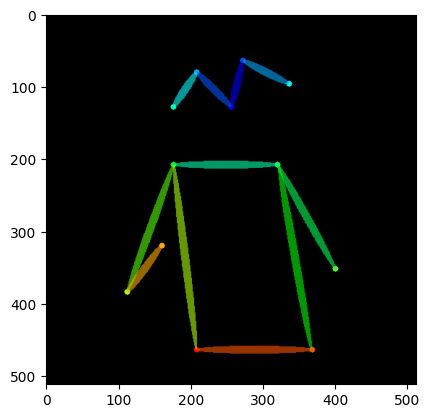

In [9]:
# text = 'A man riding a surfboard on top of a wave in the ocean.'
# text = 'A man is walking.'
text = 'A girl is drinking coffee'
# text = 'A woman is cooking a meal'
num_images = 1
output = model(prompt=text,negative_prompt=None,height=256,width=256,num_inference_steps=27,num_images_per_prompt=num_images)
for im in range(num_images):
    image = output[0][im]
    keypoint_coor = get_coor(image)
    subset = get_subs(channel_num=17, coordinates=keypoint_coor)
    canvas = draw_bodypose(np.array(keypoint_coor), np.array([subset]))
    canvas = np.array((canvas - np.min(canvas)) / (np.max(canvas) - np.min(canvas)))
    plt.imshow(canvas[:, :, [2, 1, 0]])
    plt.show()